In [1]:
import gym
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import time

np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)

from IPython.display import clear_output

In [2]:
env = gym.make('Taxi-v3')

action_space_size = env.action_space.n
obs_space_size = env.observation_space.n

q_table = np.zeros((obs_space_size, action_space_size))

games_to_play = 10000

learning_rate = 0.1
discount_rate = 0.6

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_rate_decay = 0.0005

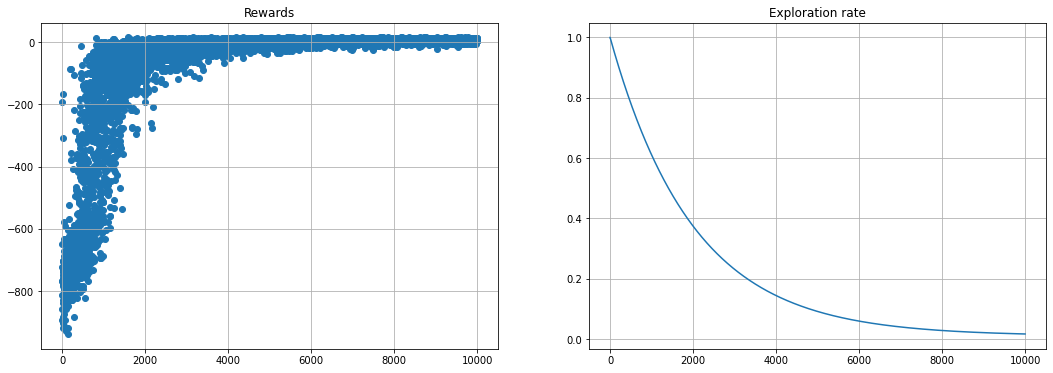

In [3]:
rewards = []
exploration_rates = []

for episode in range(games_to_play):
    state = env.reset()
    temp_reward = 0
    
    exploration_rates.append(exploration_rate)
    
    while True:
        thresh = np.random.uniform(0, 1)
        if thresh > exploration_rate:
            action = np.argmax(q_table[state, :])
        else:
            action = env.action_space.sample()
        
        new_state, reward, done, info = env.step(action)
        q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))
        
        state = new_state
        temp_reward += reward
        
        if done:
            break
            
    exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(- exploration_rate_decay * episode)
    
    rewards.append(temp_reward)
    
rewards_per_thousand_episodes = np.split(np.array(rewards), games_to_play / 1000)
count = 1000

# print('******Average reward per thousand episodes******\n')
# for r in rewards_per_thousand_episodes:
#     print(f'{count}: {sum(r/1000)}')
#     count += 1000
    
plt.figure(figsize = (18, 6))

plt.subplot(121)
plt.scatter(range(games_to_play), rewards)
plt.title('Rewards')
plt.grid()

plt.subplot(122)
plt.plot(range(games_to_play), exploration_rates)
plt.title('Exploration rate')
plt.grid()

plt.show()

In [4]:
q_table

array([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00],
       [-2.4139e+00, -2.3604e+00, -2.4143e+00, -2.3604e+00, -2.2733e+00,
        -1.1358e+01],
       [-1.8847e+00, -1.4674e+00, -1.8969e+00, -1.4750e+00, -7.5040e-01,
        -1.0461e+01],
       [-2.3615e+00, -2.2780e+00, -2.3641e+00, -2.2772e+00, -2.1221e+00,
        -1.1274e+01],
       [-2.4943e+00, -2.4942e+00, -2.4943e+00, -2.4943e+00, -1.1456e+01,
        -1.1425e+01],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00],
       [-2.4947e+00, -2.4948e+00, -2.4948e+00, -2.4948e+00, -1.1469e+01,
        -1.1472e+01],
       [-2.4746e+00, -2.4755e+00, -2.4753e+00, -2.4753e+00, -1.1416e+01,
        -1.1427e+01],
       [-2.2741e+00, -2.3222e+00, -2.3261e+00, -2.3271e+00, -1.1243e+01,
        -1.1229e+01],
       [-2.4706e+00, -2.4714e+00, -2.4719e+00, -2.4725e+00, -1.1421e+01,
        -1.1422e+01],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.

In [5]:
for i in range(10):
    total_reward = 0
    state=env.reset()
    start=list(env.decode(state))[2]
    end=list(env.decode(state))[3]
    points=['R','G','Y','B']
    
    while True:
        clear_output(wait = True)
        print(f'Episode {i+1}: {points[start]} -> {points[end]}')
        
        env.render()
        action = np.argmax(q_table[state])
        state, reward, done, debug = env.step(action)
        total_reward += reward
        print(f'Step reward: {reward}')
        print(f'Total reward: {total_reward}')
        
        time.sleep(0.5)
        
        if done:
            print('Episode done')
            time.sleep(2)
            break

Episode 10: R -> Y
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
Step reward: 20
Total reward: 9
Episode done
